In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder


In [181]:
superstore = pd.read_csv("SampleSuperstore - SampleSuperstore (1).csv")
superstore.head(15)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [182]:
superstore.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [183]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [184]:
superstore.isnull().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [185]:
superstore.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [186]:
superstore.corr()


,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [187]:
superstore['Category'].unique()


array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [188]:
superstore['Category'].value_counts()


Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [189]:
superstore['Sub-Category'].nunique()


17

In [190]:
superstore['Sub-Category'].value_counts()


Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

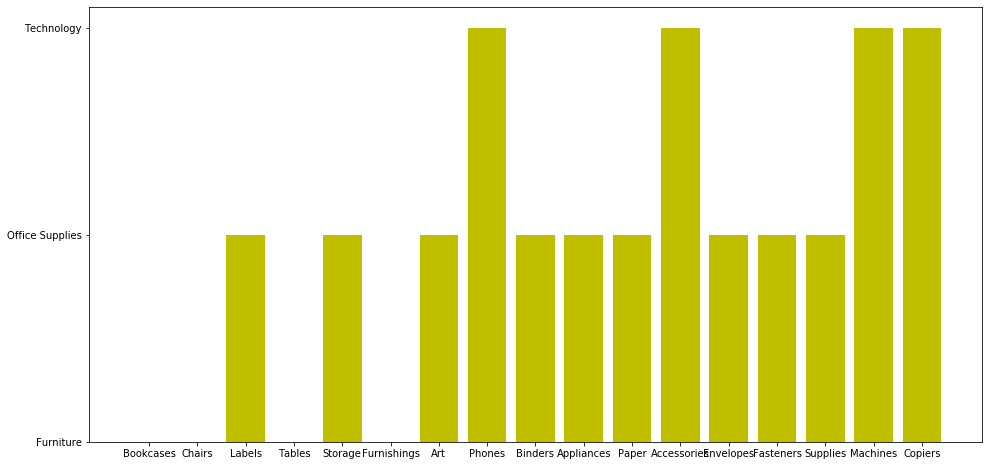

In [191]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=superstore,color='y')
plt.show()


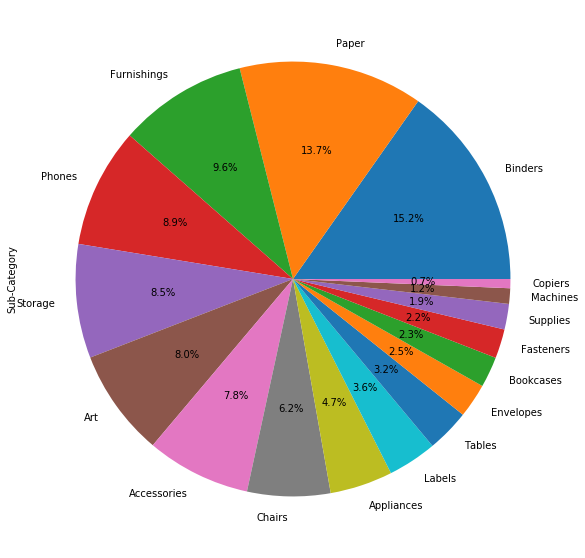

In [192]:
plt.figure(figsize=(12,10))
superstore['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()


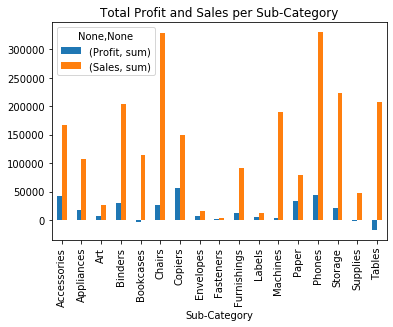

In [193]:
superstore.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
# plt.legend('Profit')
# plt.legend('Sales')
plt.show()


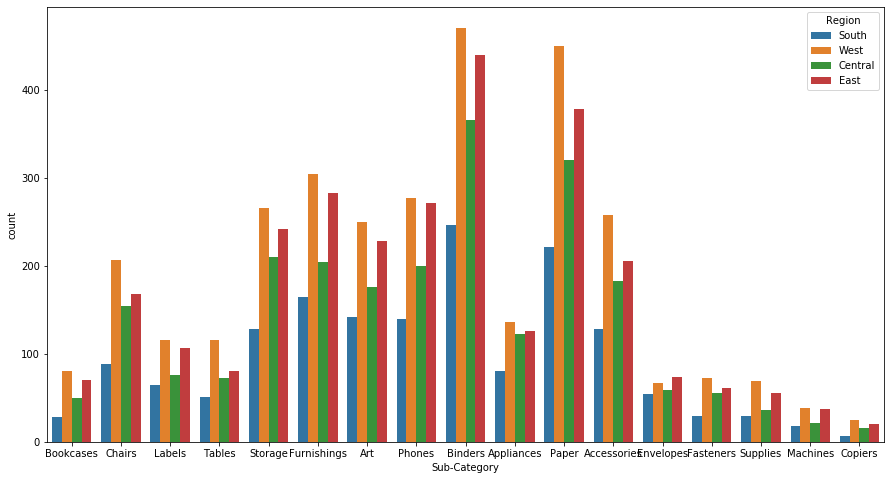

In [195]:
#Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=superstore)
plt.show()


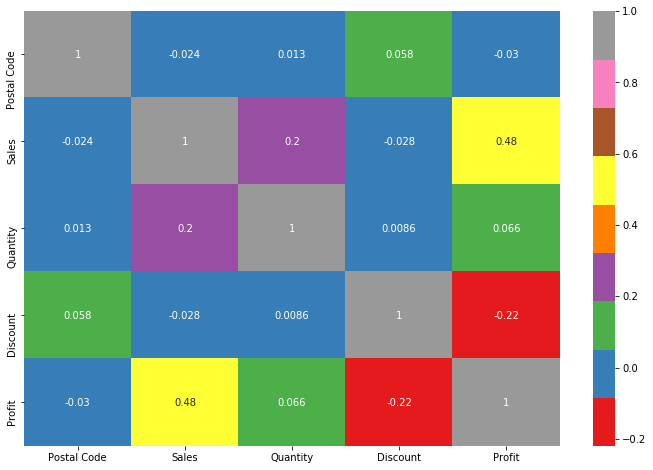

In [147]:
plt.figure(figsize = (12,8))
sns.heatmap(superstore.corr(),annot = True,cmap = 'Set1')


In [197]:
superstore['Cost']=superstore['Sales']-superstore['Profit']
superstore['Cost'].head()


0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64

In [148]:
superstore['Ship Mode'].value_counts()


Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

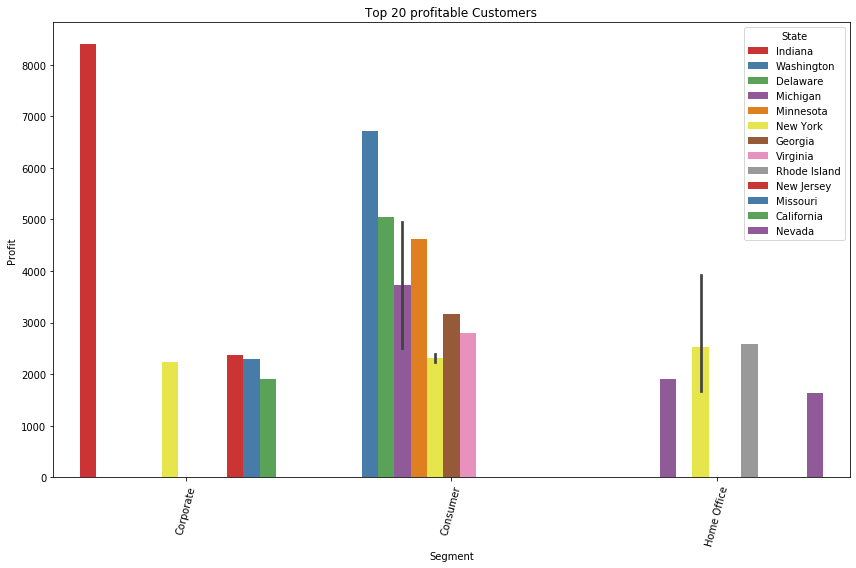

In [207]:
#segments and their profit
sortedTop20 = superstore.sort_values(['Profit'], ascending=False).head(20)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Segment', y='Profit',hue='State',palette='Set1', data=sortedTop20, ax=ax)
ax.set_title("Top 20 profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()


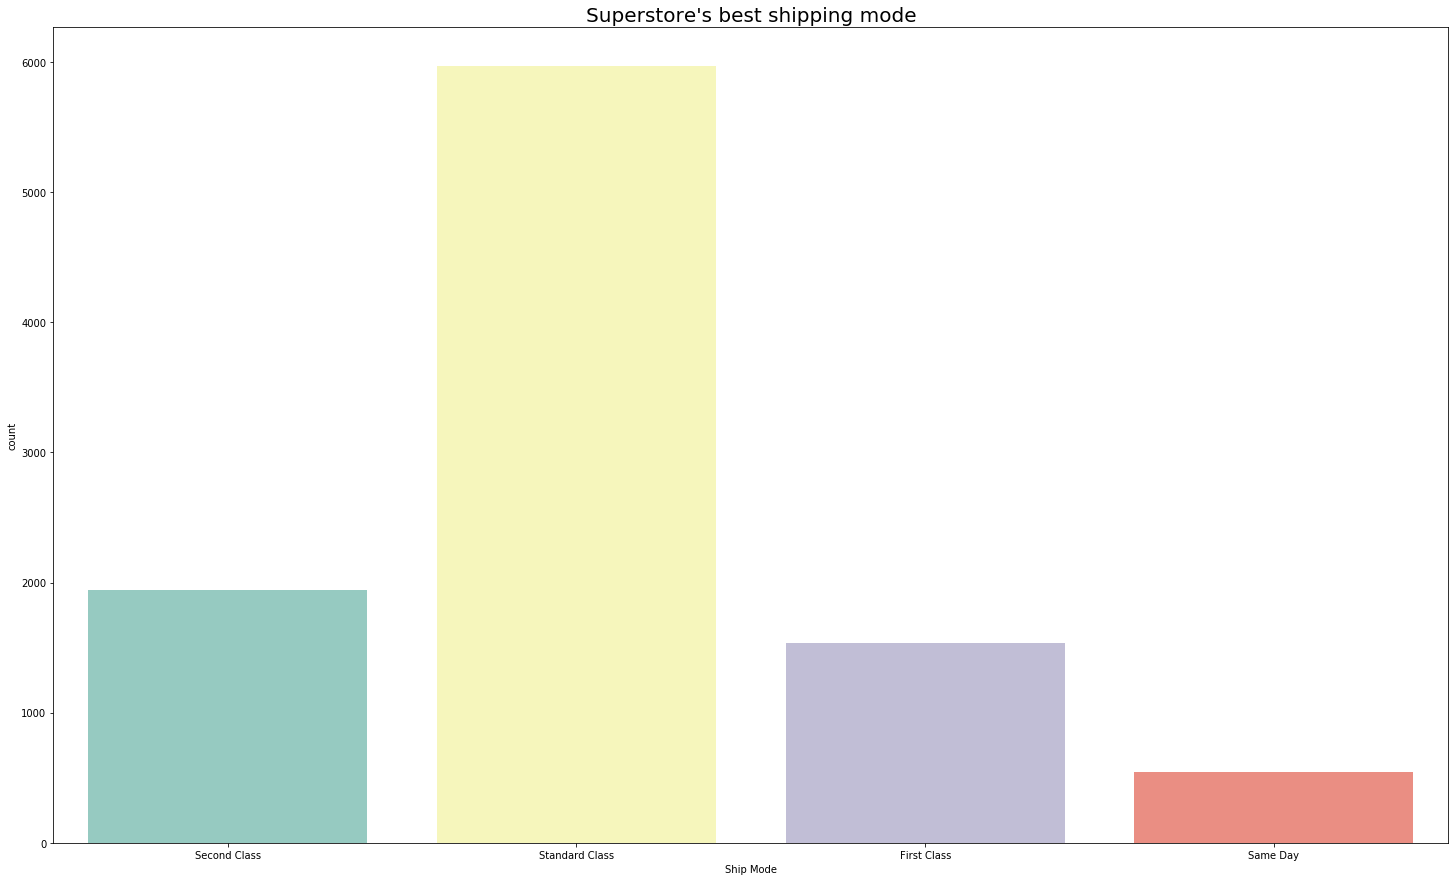

In [149]:
plt.figure(figsize = (25,15))
sns.countplot(superstore['Ship Mode'],palette='Set3')
plt.title("Superstore's best shipping mode",size = 20)
plt.show()


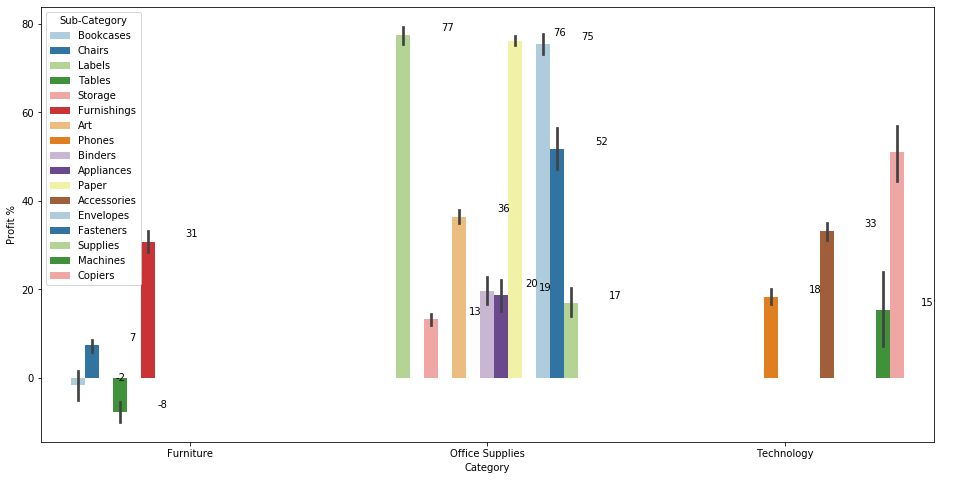

In [210]:
#Calculating Profit gained in each Category
fig=plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.barplot('Category','Profit %',hue='Sub-Category',palette='Paired',data=superstore)
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_height()+1))
plt.show()


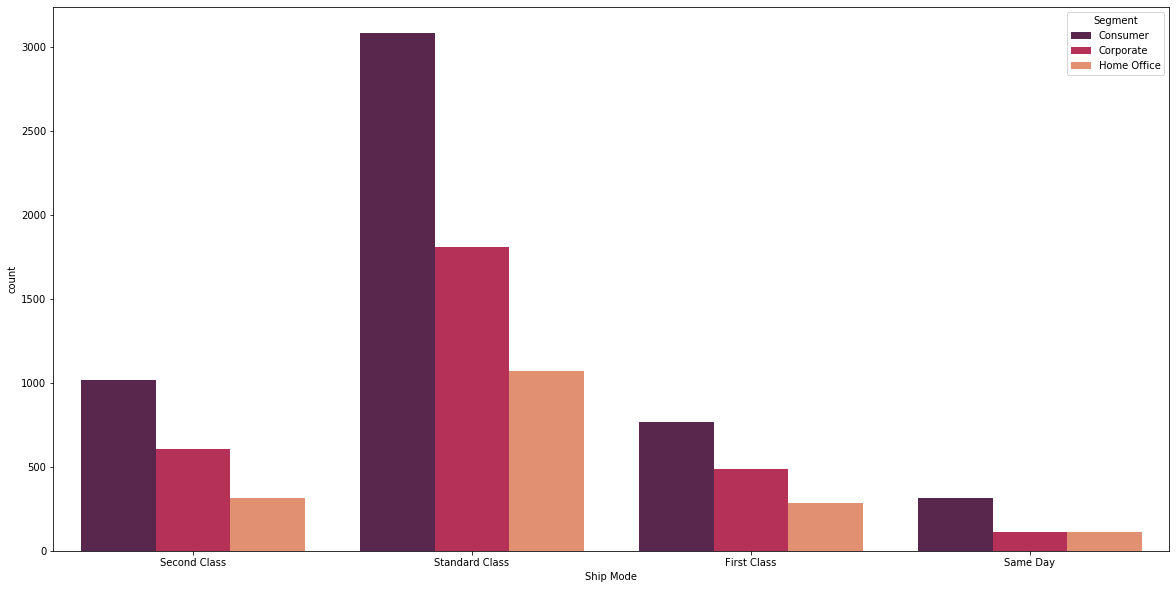

In [99]:
plt.figure(figsize = (20,10))
sns.countplot('Ship Mode',data = superstore,hue='Segment',palette='rocket')
plt.show()


In [113]:
grossratingpoint = superstore.groupby('Segment')['Quantity'].sum().reset_index()
grossratingpoint


,Segment,Quantity
0,Consumer,19521
1,Corporate,11608
2,Home Office,6744


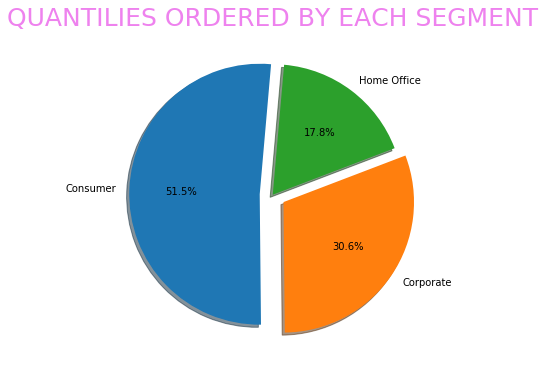

In [114]:
piechart_labels = superstore['Segment'].unique()
plt.figure(figsize=(8,6))
plt.pie(grossratingpoint['Quantity'],autopct='%1.1f%%',labels=piechart_labels,explode=(0.1,0.1,0),shadow=True,startangle=85)
plt.title('QUANTILIES ORDERED BY EACH SEGMENT',size=25,color = 'violet')
plt.show()


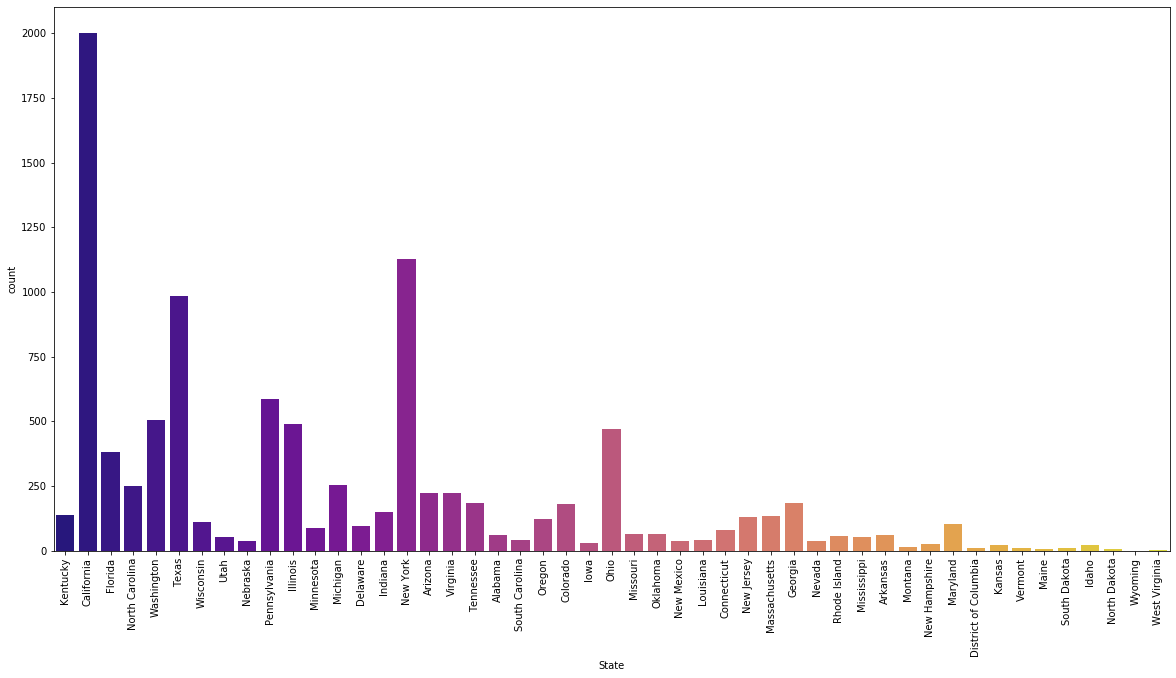

In [115]:
plt.figure(figsize =(20,10))
sns.countplot(superstore['State'],palette = 'plasma')
plt.xticks(rotation = 90)
plt.show()


In [116]:
top10_cities = superstore.groupby('City')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)
top10_cities


,City,Quantity
329,New York City,3417
266,Los Angeles,2879
374,Philadelphia,1981
438,San Francisco,1935
452,Seattle,1590
...,...,...
213,Iowa City,1
386,Port Orange,1
257,Lindenhurst,1
259,Littleton,1


In [117]:
top10_cities.head(10)


,City,Quantity
329,New York City,3417
266,Los Angeles,2879
374,Philadelphia,1981
438,San Francisco,1935
452,Seattle,1590
207,Houston,1466
80,Chicago,1132
94,Columbus,836
437,San Diego,670
464,Springfield,649


<Figure size 1800x720 with 0 Axes>

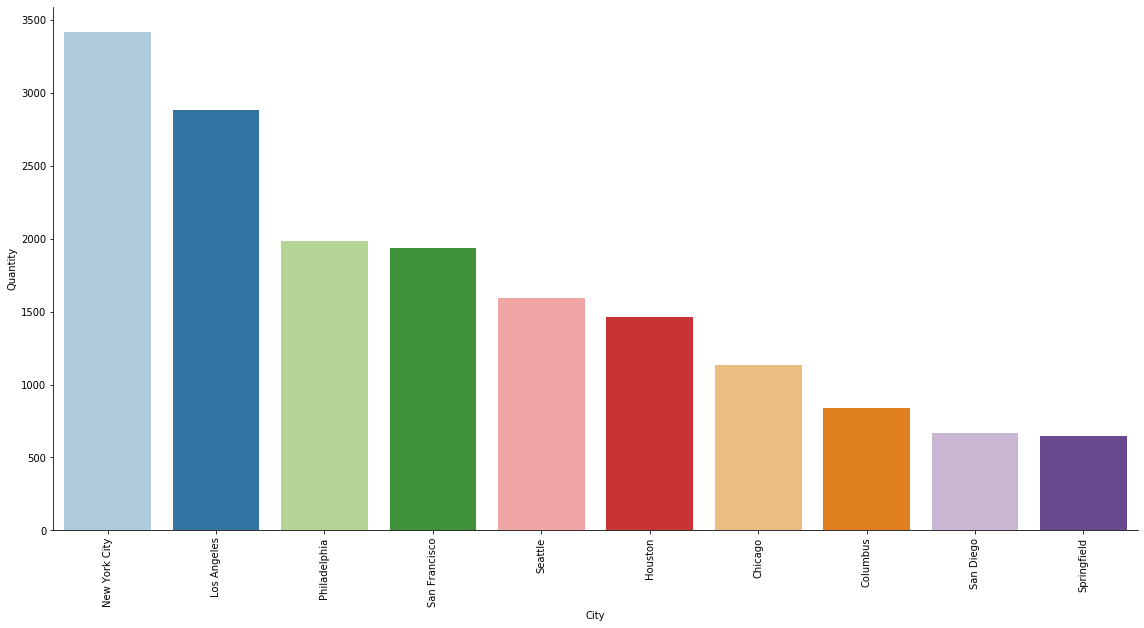

In [118]:
plt.figure(figsize = (25,10))
sns.catplot('City','Quantity',data = top10_cities.head(10),kind = 'bar',height=8,aspect=2,palette='Paired')
plt.xticks(rotation=90)
plt.show()


In [119]:
regions  = superstore.groupby('Region')['Quantity'].sum().reset_index()
regions


,Region,Quantity
0,Central,8780
1,East,10618
2,South,6209
3,West,12266


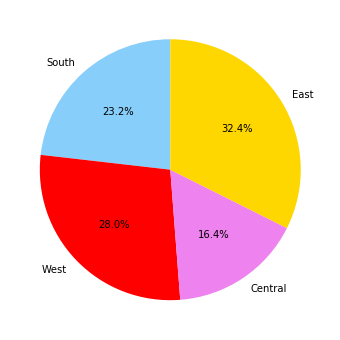

In [120]:
labels = superstore['Region'].unique()
plt.figure(figsize=(8,6))
colors = ['lightskyblue', 'red','violet', 'gold']
plt.pie(regions['Quantity'], labels= labels, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()


In [121]:
category = superstore.groupby('Category')['Quantity'].sum().reset_index()
category


,Category,Quantity
0,Furniture,8028
1,Office Supplies,22906
2,Technology,6939


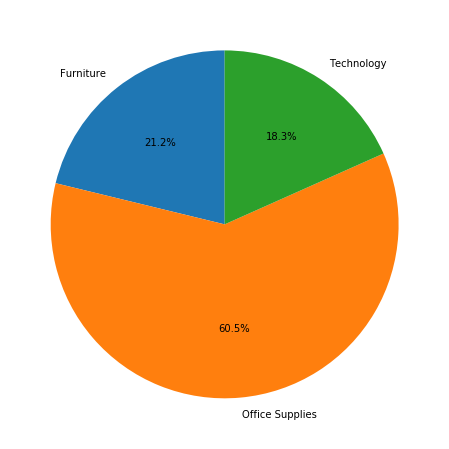

In [122]:
labels = superstore['Category'].unique()
plt.figure(figsize=(8,8))
colors = ['red','green','blue']
plt.pie(category['Quantity'], labels= labels, startangle=90, autopct='%.1f%%')
plt.show()


In [123]:
category = superstore.groupby('Category')['Profit'].sum().reset_index()
category


,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


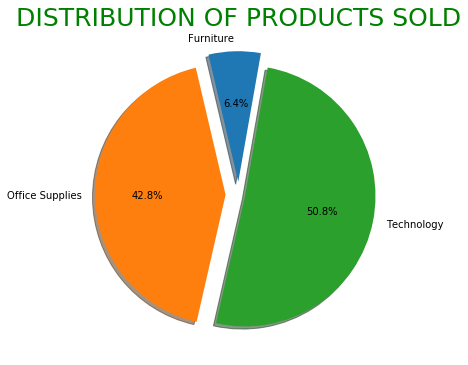

In [125]:
labels = superstore['Category'].unique()
plt.figure(figsize=(8,6))
plt.pie(category['Profit'],autopct='%1.1f%%',labels=labels,explode=(0.1,0.1,0.05),shadow=True,startangle=80)
plt.title('DISTRIBUTION OF PRODUCTS SOLD',size=25,color = 'green')
plt.show()


In [133]:
items = superstore.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by = 'Profit',ascending = False)
items.head(10)


,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


Text(0.5, 6.799999999999997, 'products')

<Figure size 1440x720 with 0 Axes>

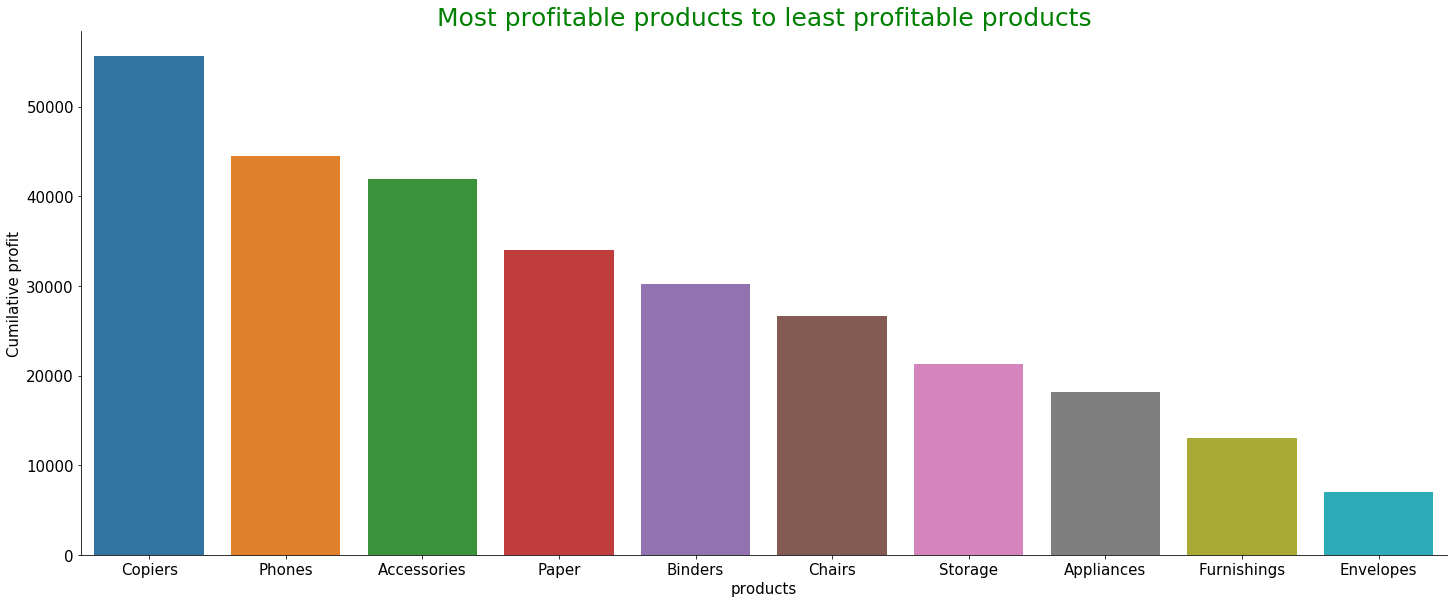

In [137]:
plt.figure(figsize =(20,10))
sns.catplot('Sub-Category','Profit',data=items.head(10),kind='bar',aspect=2.5,height=8,palette='tab10')
plt.title('Most profitable products to least profitable products',size=25,color = 'Green')
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Cumilative profit',size=15)
plt.xlabel('products',size=15)


In [139]:
city = superstore.groupby('City')['Profit'].sum().reset_index().sort_values(by = 'Profit',ascending = False)
city.head(10)


,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


Text(0.5, 6.799999999999997, 'City')

<Figure size 1440x720 with 0 Axes>

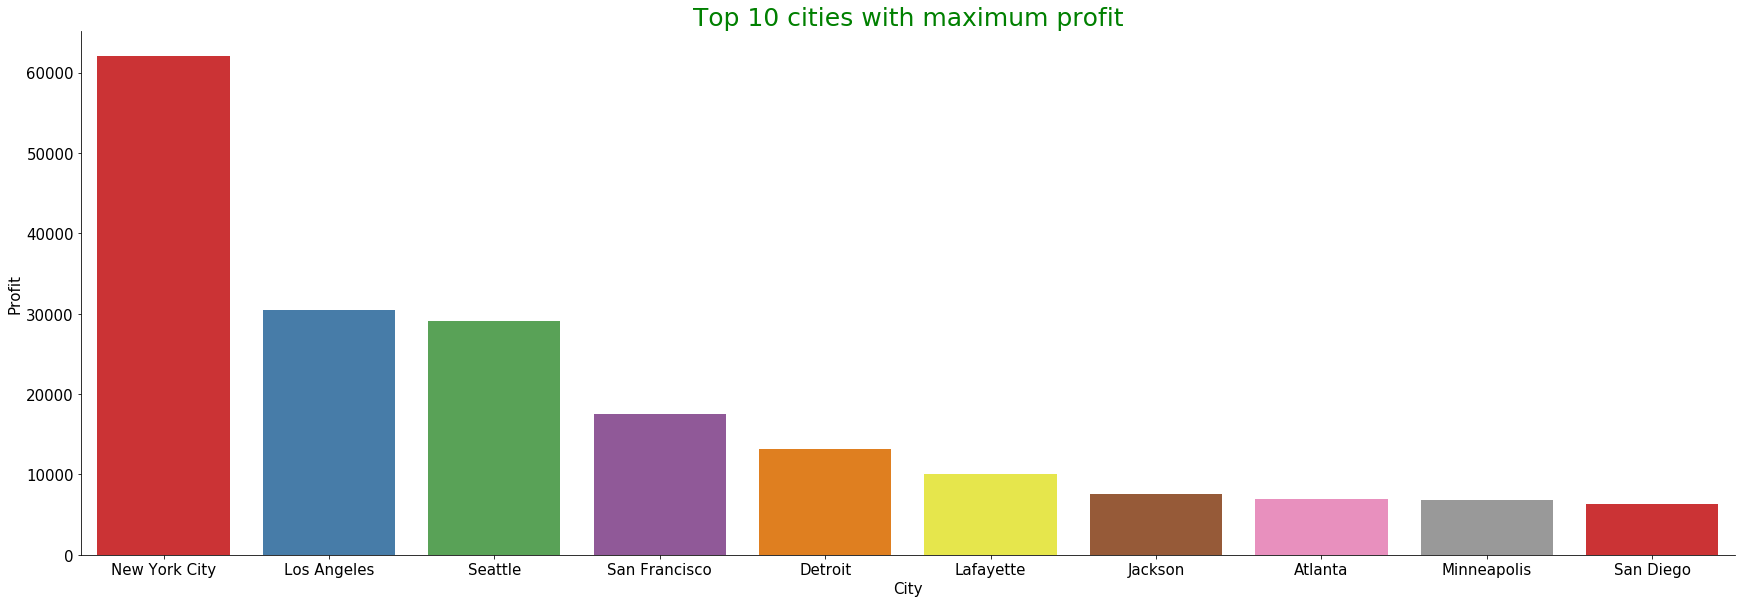

In [212]:
plt.figure(figsize =(20,10))
sns.catplot('City','Profit',data=city.head(10),kind='bar',aspect=3,height=8,palette='Set1')
plt.title('Top 10 cities with maximum profit',size=25,color = 'Green')
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Profit',size=15)
plt.xlabel('City',size=15)
